# MNIST Tutorial

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


### Neural Network Contruction

In [9]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None,10])
keep_prob = tf.placeholder(tf.float32)

사진의 해상도가 28*28 이므로 각각의 픽셀을 feature로 사용하여 784개로 정한다.  
결과는 0~9의 10가지 분류를 가지므로 10으로 한다.

In [10]:
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model  = tf.matmul(L2,W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Neural Network의 Layer는 784 -> 256 -> 256 -> 10으로 구성되어 있다.
이때 오버피팅을 방지하기 위해서 dropout 함수를 사용한다.

## dropout 함수란?
Neural Network에서는 망의 크기가 커질 수록 정확도도 높아지지만, 그만큼 Overfitting의 가능성도 높아지게 된다. Dropout 함수는 어떤 학습을 할 때, 망에 있는 모든 layer에 대해서 학습을 수행하지 않고 아래 그림과 같이 입력 layer나 hidden layer의 일부 뉴런을 생략(dropout)하고 줄어든 신경망을 통해 학습을 수행한다.  
![Image](https://cdn-images-1.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png)

## Neural Network 학습

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys, keep_prob:0.8})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. Cost = ', '{:.3f}'.format(total_cost / total_batch))
print('Optimization Complete!')

('Epoch:', '0001', 'Avg. Cost = ', '0.422')
('Epoch:', '0002', 'Avg. Cost = ', '0.159')
('Epoch:', '0003', 'Avg. Cost = ', '0.112')
('Epoch:', '0004', 'Avg. Cost = ', '0.088')
('Epoch:', '0005', 'Avg. Cost = ', '0.074')
('Epoch:', '0006', 'Avg. Cost = ', '0.058')
('Epoch:', '0007', 'Avg. Cost = ', '0.052')
('Epoch:', '0008', 'Avg. Cost = ', '0.045')
('Epoch:', '0009', 'Avg. Cost = ', '0.042')
('Epoch:', '0010', 'Avg. Cost = ', '0.036')
('Epoch:', '0011', 'Avg. Cost = ', '0.035')
('Epoch:', '0012', 'Avg. Cost = ', '0.032')
('Epoch:', '0013', 'Avg. Cost = ', '0.028')
('Epoch:', '0014', 'Avg. Cost = ', '0.027')
('Epoch:', '0015', 'Avg. Cost = ', '0.029')
('Epoch:', '0016', 'Avg. Cost = ', '0.022')
('Epoch:', '0017', 'Avg. Cost = ', '0.023')
('Epoch:', '0018', 'Avg. Cost = ', '0.021')
('Epoch:', '0019', 'Avg. Cost = ', '0.020')
('Epoch:', '0020', 'Avg. Cost = ', '0.022')
('Epoch:', '0021', 'Avg. Cost = ', '0.020')
('Epoch:', '0022', 'Avg. Cost = ', '0.019')
('Epoch:', '0023', 'Avg. Cost = 

## 결과 확인

In [12]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy : ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

('Accuracy : ', 0.9821)


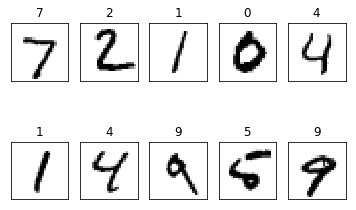

In [13]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),cmap=plt.cm.gray_r)
    
plt.show()